In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
match_data = pd.read_csv('G:\Business Analytics\IPL Data Analysis\IPL Dataset and Code\IPL Matches 2008-2020.csv')
ball_data = pd.read_csv('G:\Business Analytics\IPL Data Analysis\IPL Dataset and Code\IPL Ball-by-Ball 2008-2020.csv')

In [3]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


##### Check if there is null values in the dataset

In [5]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [7]:
match_data.shape

(816, 17)

In [9]:
ball_data.shape

(193468, 18)

In [10]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [11]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [18]:
print('Matches played so far :', match_data.shape[0])
print('''''')
print('Cities in which matches played :', match_data['city'].unique())
print('\n Total number of teams participted till now : ', match_data['team1'].unique())

Matches played so far : 816

Cities in which matches played : ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Total number of teams participted till now :  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


##### Create a new column and extract only year 

In [27]:
match_data['Season'] = pd.DatetimeIndex(match_data['date']).year

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '18-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '19-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '20-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '21-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pars

In [28]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [35]:
match_per_season = match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'Matches'})
match_per_season

,Season,Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


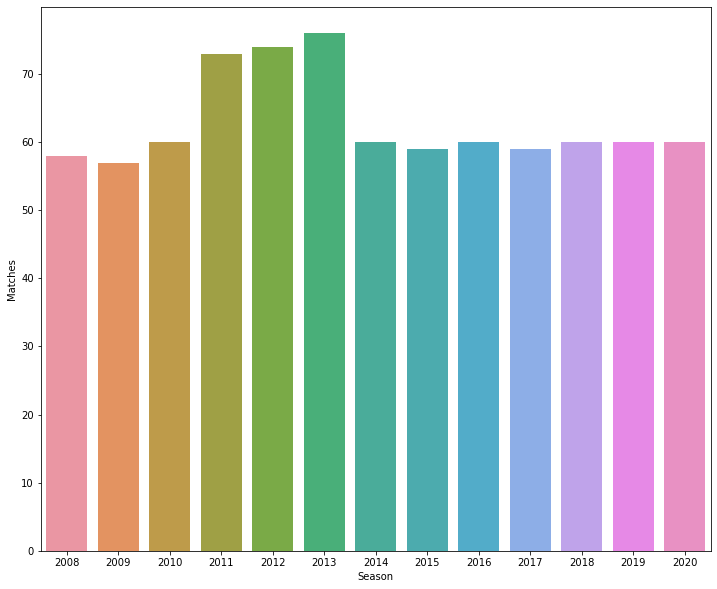

In [38]:
plt.figure(figsize=(12,10))
sns.barplot(x = match_per_season['Season'] , y = match_per_season['Matches'])
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


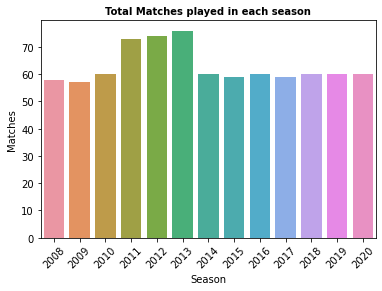

In [43]:
sns.countplot(match_data['Season'])
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season',fontsize=10)
plt.ylabel('Matches',fontsize=10)
plt.title('Total Matches played in each season',fontsize=10,fontweight='bold')
plt.show()

##### merging

In [44]:
season_data = match_data[['id','Season']].merge(ball_data , left_on='id' , right_on='id' , how='left').drop('id',axis=1)
season_data

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [45]:
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


##### Total runs scored in each season

In [46]:
season = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
season

,Season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


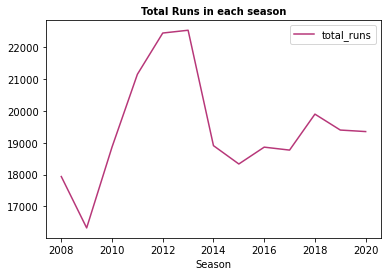

In [52]:
p=season.set_index('Season')
#ax = plt.axes()
#ax.set(facecolor='black')
sns.lineplot(data= p , palette='magma')
plt.title('Total Runs in each season' , fontsize=10 , fontweight='bold')
plt.show()

##### Runs per season

In [70]:
runs_per_season = pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs Scored Per Match'] = runs_per_season['total_runs']/runs_per_season['Matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season

,Matches,total_runs,Runs Scored Per Match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


##### TOSS

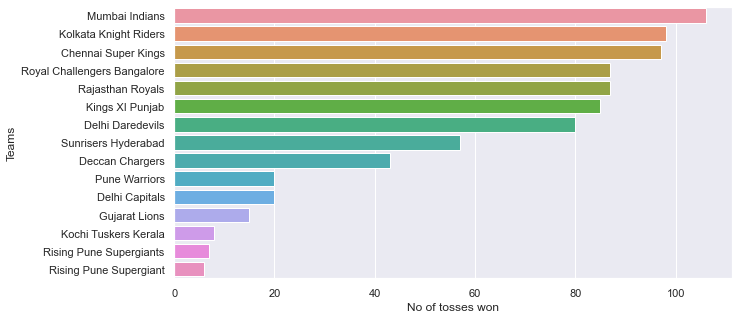

In [85]:
toss = match_data['toss_winner'].value_counts()
#ax = plt.axes()
#ax.set(facecolor='black')
sns.set(rc={'figure.figsize':(10,5)},style ='darkgrid')
ax.set_title('No of tosses won by each team',fontsize=10,fontweight='bold')
sns.barplot(x=toss , y=toss.index)
plt.xlabel('No of tosses won')
plt.ylabel('Teams')
plt.show()

##### TOSS DECISIONS

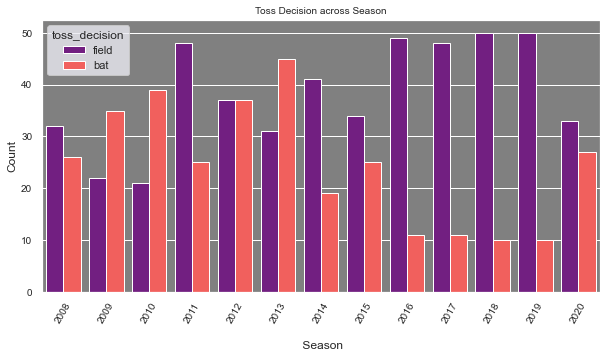

In [96]:
ax = plt.axes()
ax.set(facecolor='grey')
sns.countplot(x = 'Season' , data=match_data , hue='toss_decision' , palette='magma' , saturation=1)
plt.xticks(rotation=60 , fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Season')
plt.ylabel('Count')
plt.title('Toss Decision across Season',fontsize=10)
plt.show()

##### Result

In [97]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

##### Which statdium is best for winning by wickets   Bat second

In [101]:
match_data.venue[match_data.result != 'runs'].mode()

0    Eden Gardens
Name: venue, dtype: object

##### Which stadium is best for winning by runs  Bat First

In [100]:
match_data.venue[match_data.result != 'wickets'].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

##### Which stadium is best when they win the toss

In [102]:
match_data.venue[match_data.toss_winner == 'Kings XI Punjab'][match_data.winner=='Kings XI Punjab'].mode()

0    Punjab Cricket Association Stadium, Mohali
Name: venue, dtype: object

In [103]:
match_data.venue[match_data.toss_winner == 'Mumbai Indians'][match_data.winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
Name: venue, dtype: object

In [104]:
match_data.venue[match_data.toss_winner == 'Chennai Super Kings'][match_data.winner=='Chennai Super Kings'].mode()

0    MA Chidambaram Stadium, Chepauk
Name: venue, dtype: object

##### Successful Chasing Team means Team won by Batting Second

In [110]:
match_data.winner[match_data.result != 'runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

##### Successful Defending Team means Team won by Batting First

In [112]:
match_data.winner[match_data.result != 'wickets'].mode()

0    Mumbai Indians
Name: winner, dtype: object

##### Does Winning the toss means Winning the Match ????????????

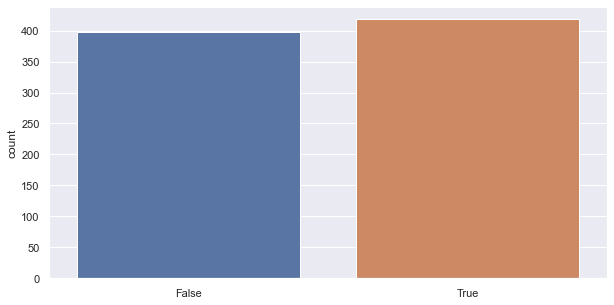

In [114]:
toss = match_data['toss_winner'] == match_data['winner']
plt.figure(figsize=(10,5))
sns.countplot(x=toss)
plt.show()

##### Does choosing batting or bowling first choose winning match ?????

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


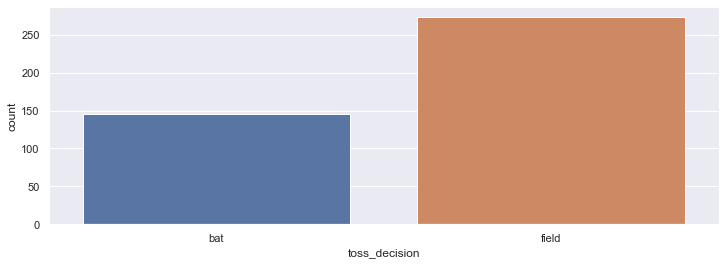

In [117]:
plt.figure(figsize=(12,4))
sns.countplot(match_data.toss_decision[match_data.toss_winner == match_data.winner])
plt.show()

# Now Ball-by-Ball Data

In [118]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [121]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [124]:
player = (ball_data['batsman'] == 'SK Raina')
df_raina = ball_data[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


##### How Suresh Raina has been dismissed throughout the IPL

In [125]:
df_raina['dismissal_kind'].value_counts()

caught               110
bowled                16
run out               12
caught and bowled      8
stumped                8
lbw                    6
Name: dismissal_kind, dtype: int64

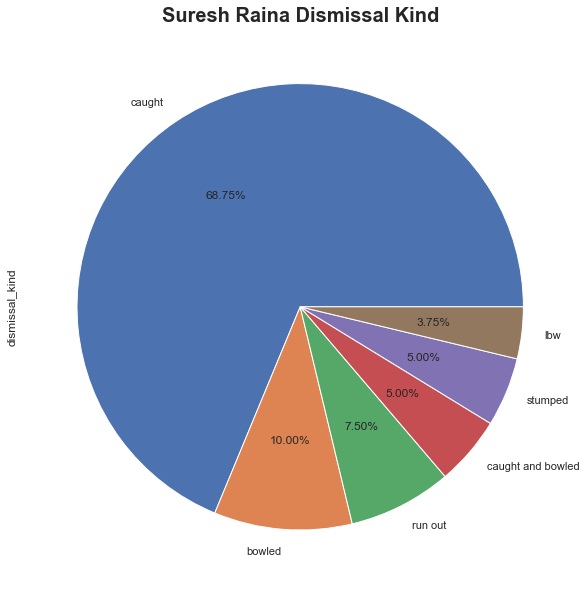

In [141]:
plt.figure(figsize=(10,12))
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Suresh Raina Dismissal Kind' , fontsize=20 , fontweight='bold')
plt.show()

In [134]:
player = (ball_data['batsman'] == 'V Kohli')
df_virat = ball_data[player]
df_virat.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [138]:
df_virat['dismissal_kind'].value_counts()

caught               105
bowled                30
run out               15
lbw                    7
stumped                3
caught and bowled      3
Name: dismissal_kind, dtype: int64

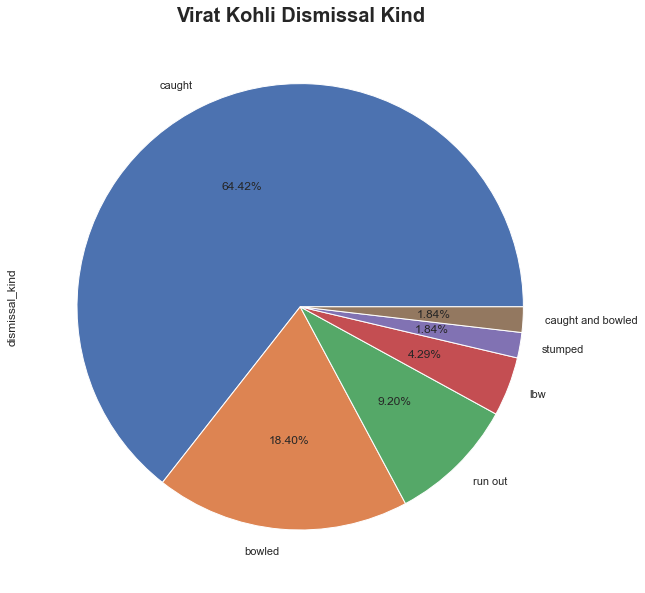

In [142]:
plt.figure(figsize=(10,12))
df_virat['dismissal_kind'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Virat Kohli Dismissal Kind' , fontsize=20 , fontweight='bold')
plt.show()

##### RUNS SCORED BY Suresh Raina in the form of 1's 2's 3's and Boundary

In [143]:
def count(df_raina,runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs

In [146]:
print("Runs Scored from 1's :" ,count(df_raina,1))
print("Runs Scored from 2's :" ,count(df_raina,2))
print("Runs Scored from 3's :" ,count(df_raina,3))
print("Runs Scored from 4's :" ,count(df_raina,4))
print("Runs Scored from 5's :" ,count(df_raina,5))
print("Runs Scored from 6's :" ,count(df_raina,6))

Runs Scored from 1's : 1666
Runs Scored from 2's : 528
Runs Scored from 3's : 33
Runs Scored from 4's : 1972
Runs Scored from 5's : 5
Runs Scored from 6's : 1164


##### Match winner in terms of biggest margin

In [147]:
match_data[match_data['result_margin']==match_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


##### Players scored maximum runs in IPL

In [158]:
player_runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
player_runs.columns = ['Batsman' , 'runs']
y = player_runs.sort_values(by='runs' ,ascending=False).head(10).reset_index().drop('index',axis=1)
y

,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


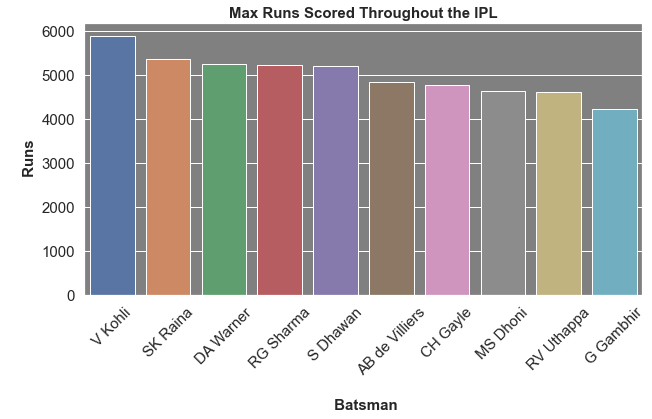

In [169]:
ax = plt.axes()
ax.set(facecolor='grey')
sns.barplot(x = y.Batsman , y = y.runs)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('\n Batsman', fontsize=15 , fontweight='bold')
plt.ylabel('\n Runs', fontsize=15 , fontweight='bold')
plt.title('Max Runs Scored Throughout the IPL', fontsize=15 , fontweight='bold')
plt.show()

In [184]:
match_data['player_of_match'].value_counts()[:10]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

##### Highest Man of the Match Award Winners

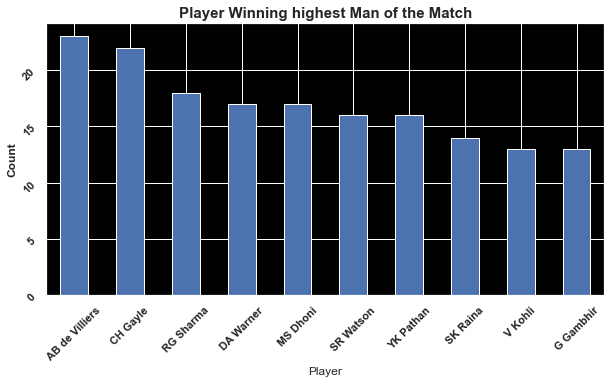

In [183]:
ax = plt.axes()
ax.set(facecolor='black')
match_data['player_of_match'].value_counts()[:10].plot(kind='bar')
plt.xticks(rotation=45,fontweight='bold')
plt.yticks(rotation=45,fontweight='bold')
plt.xlabel('Player')
plt.ylabel('Count',fontweight='bold')
plt.title('Player Winning highest Man of the Match' , fontsize=15,fontweight='bold')
plt.show()